# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

In [ ]:
# !pip install --user graphviz 
# !apt-get install graphviz

# Drzewa klasyfikacyjne (metoda rekurencyjnego podziału)

Metoda ta polega na sekwencyjnym (rekurencyjnym) podziale przestrzeni danych na podprzestrzenie (hiperkostki, segmenty), aż zmienna zależna osiągnie w każdej podprzestrzeni minimalny poziom zróżnicowania.


## Wady i zalety drzewa decyzyjnego
**Zalety:**

1. *niezparametryczność* – przy budowaniu modelu nie zakłada się postaci rozkładów zmiennych ani relacji między nimi
2. *adaptacyjność* – automatyczny proces doboru zmiennych do modelu, możliwość uwzględnieniem zarówno zmiennych jakościowych i ilościowych,
3. *odporność na braki danych oraz występowanie wartości
nietypowych* 
4. *łatwa interpretowalność* -  możliwość graficznego przedstawienia modelu w postaci drzewa, możliwość zapisania reguł klasyfikujących

**Główna wada:**

1. *niestabilność modelu* -  oznacza, że postać modelu silnie zależy od dostępnego zbioru uczącego, budowanie drzew na różnych podzbiorach trenujących daje bardzo różniące się modele

## Algorytm tworzenia drzewa klasyfikującego

**Kroki algorytmu**

1. Mając treningowy zbiór obiektów $S$, sprawdź, czy należą one do tej samej klasy. Jeżli
tak, to zakończ pracę.
2. W przeciwnym przypadku rozważ wszystkie możliwe podziały zbioru S na
podzbiory $S_1$, $S_2$, ..., $S_m$ tak, aby były one jak najbardziej jednorodne.
3. Dokonaj oceny jakości każdego z tych podziałów zgodnie z przyjętym kryterium
i wybierz najlepszy z nich.
4. Podziel zbiór $S$ w wybrany sposób.
5. Wykonaj kroki 1-4 rekurencyjnie dla każdego z podzbiorów

W domyślnej wersji algorytmu każdorazowo poszukiwany jest najlepszy podział pod względem zmiennej jak i sposobu podziału przestrzeni względem niej. To domyślne działanie można jednak zmienić, o czym powiemy za chwilę. 


## Kryterium podziału 
Domyślnie kryterium podziału jest minimalizacja zróżnicowania (heterogeniczności) elementów w każdym z podziałów. W powyższym przykładzie wykorzystywany jest wskaźnik Giniego.


W pierwszej kolejności dla każdej z $K$ klas ($k \in K$) dla każdego z $M$ podobszarów ($m \in M$) wyznaczana jest średnia ilość elementów danej klasy w tym obszarze:

$$p_{km} = \frac{1}{N_s}\sum_{x_i \in S_m}I(y_i=k)$$

$N_s$ to ilość elementów w danym obszarze.

Współczynnik Giniego definiujemy jako:
$$H(m) = \sum_k p_{km}(1-p_{km})$$

Gdy w danym obszerze występują tylko reprezentanci jednej klasy $p_{km}=1$ dla tej wybranej klasy. Dla pozostałych klas współczynnik ten wynosi 0. Wówczas $H=0$ dla takiego obszaru.


### Klasyfikacja z wykorzystaniem metody rekurencyjnego podziału dla danych `iris`

W pierwszym kroku importujemy przydatne biblioteki. Drzewa klasyfikacyjne zostały zaimplementowane w bibliotece `sklearn`.

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split

Dodatkowo biblioteka `graphviz` będzie przydatna do wizualizacji otrzymanych drzew.

In [3]:
import graphviz 
import numpy as np
import matplotlib.pyplot as plt

#### Zestaw danych IRIS

Informacje o kwiatech o polskiej nazwie **kosaciec**  dostępne w zestawie *Iris* zostały zebrane przez  biologa Ronalda Fishera w roku 1936. Wykorzystał on je w pracy  *The use of multiple measurements in taxonomic problems*.

#### Iris Setosa
<img src="https://i.ebayimg.com/images/g/xEgAAOSwoBtW6BoO/s-l1600.jpg" width=250px>

#### Iris Virginica
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/1280px-Iris_virginica_2.jpg" width=250px>
#### Iris Versicolor
<img src="http://latour-marliac.com/323-large_default/iris-versicolor-iris-versicolore.jpg" width=250px>


Dla reprezentantów poszczególnych  gatunków mierzono długość i szerokość płatka „petal” i działki kielicha kwiatu „sepal”.

**Krok 1:** Podziel dane na dane treningowe i testowe w proporcji 0.77 do 0.33. Ustaw `random_state` na 1.

In [4]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Krok 2:** Trening klasyfikatora  `DecisionTreeClassifier` z biblioteki `sklearn`

In [6]:
%%time

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

CPU times: user 1.8 ms, sys: 0 ns, total: 1.8 ms
Wall time: 1.33 ms


**Krok 2.1:** Podgląd otrzymanego drzewa decyzyjnego

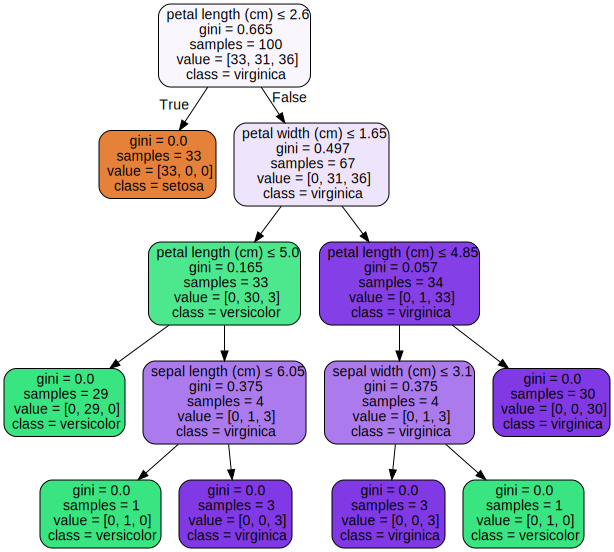

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Zadanie**

Do jakiej klasy został przyporządkowany irys z zestawu testowego X_test[10]. Podaj nazwę.

In [8]:
name_10th = None
# YOUR CODE HERE
print(iris.target_names[clf.predict([X_test[10]])])

name_10th = iris.target_names[clf.predict([X_test[10]])][0]


['versicolor']


In [9]:
assert name_10th == 'versicolor'

## Dokładność modelu

Metodą `score` wyznacz dokładność otrzymanego modelu

In [10]:

score = clf.score(X_test,y_test)


In [11]:
assert score >0.95 and score < 0.97

## Podgląd otrzymanych podziałów

Aby można było zwizualizować otrzymane podziały konieczna jest redukcja przestrzeni cech do dwóch wymirów. Oznacza to, że podczas klasyfikacji uwzględniamy tylko 2 zmienne objaśniające.


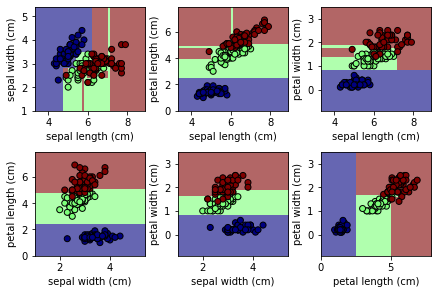

In [12]:
# Parameters
n_classes = 3
plot_step = 0.02


plt.set_cmap(plt.cm.jet)


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  
    # We train classifier only on 2 features
    X = iris.data[:, pair]
    y = iris.target

    clf_tmp = DecisionTreeClassifier().fit(X, y)

    # Plot
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
    plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")


    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.grid(False)

plt.show()


## Inne opcje poszukiwania najlepszego podziału

Kiedy mamy zbyt dużo danych lub zmiennych objaśniających czas poszukiwania optymalnego podziału rośnie. Aby w każdym kroku nie przeszukiwać wszystkich możliwych podziałów mamy dwie możliwości. Możliwe ustawienia:

### `max_features`

Ilość zmiennych uwzględnianych w czasie poszukiwania optymalnego podziału. Możliwe opcje:
*  liczba całkowita - uwzględnia dokładnie tyle ziennych podczas każdego podziału
*  liczba zmiennoprzecinkowa - tyle procent zmiennych będzie uwzględnianych
*  “auto” -  wówczas `max_features=sqrt(n_features)`.
*  “sqrt” - wówczas `max_features=sqrt(n_features)`
*  “log2” - wówczas `max_features=log2(n_features)`.
*  `None` - wówczas `max_features=n_features`.


In [13]:
clf_all = DecisionTreeClassifier()
clf_all = clf_all.fit(X_train, y_train)

print(clf_all.score(X_test, y_test), clf_all.score(X_train, y_train))


clf = DecisionTreeClassifier(max_features=1, random_state=123)
clf = clf.fit(X_train, y_train)

print(clf.score(X_test, y_test), clf.score(X_train, y_train))

0.96 1.0
0.88 1.0


### `splitter='random'`:

W tym przypadku wybór zmiennej względem której dokonywany jest podział będzie losowy.

In [14]:
%%time

clf = DecisionTreeClassifier(splitter='random', random_state=123)
clf = clf.fit(X_train, y_train)

CPU times: user 593 µs, sys: 362 µs, total: 955 µs
Wall time: 811 µs


In [15]:
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.94, 1.0)

### Porównanie 2 podziałów dla różnej inicjalizacji generatora liczb pseudolosowych

No handles with labels found to put in legend.


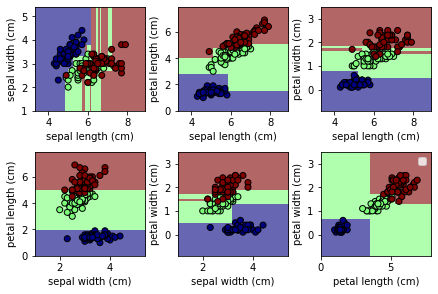

In [16]:

# Parameters
n_classes = 3
plot_step = 0.02

plt.set_cmap(plt.cm.jet)


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target


    clf_tmp = DecisionTreeClassifier(splitter='random', random_state=2).fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
    plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.grid(False)


plt.legend()
plt.show()


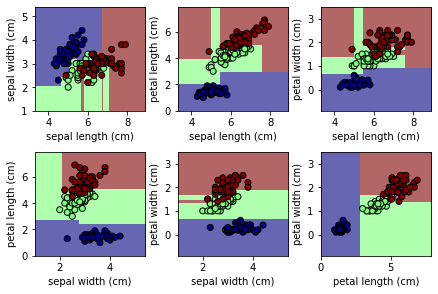

In [17]:

# Parameters
n_classes = 3
plot_step = 0.02

plt.set_cmap(plt.cm.jet)


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target


    clf_tmp = DecisionTreeClassifier(splitter='random', random_state=100).fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf_tmp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.6)
    plt.scatter(X[:,0], X[:,1],c=np.ravel(y),edgecolors='black')

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.grid(False)


plt.show()


## Przeciwdziałanie przeuczeniu

Wymuszanie jednorodności w otrzymanych podprzestrzeniach prowadzi na ogół do zbudowaniabardzo złożonego modelu, który jest nadmiernie dopasowany dodanych ze zbioru uczącego. Pojawia się wówczas efekt przeuczenia.

Następujące parametry pozwalają zmniejszyć efekt *overfittingu*. Po znaku równości zostały podane ich domyślne wartości.

*   `max_depth=None`
*   `min_samples_split=2`
*   `min_samples_leaf=1`
*  `min_impurity_decrease=0`



In [18]:
%%time

clf = DecisionTreeClassifier(min_samples_split=10)
clf = clf.fit(X_train, y_train)

CPU times: user 990 µs, sys: 335 µs, total: 1.32 ms
Wall time: 962 µs


In [19]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

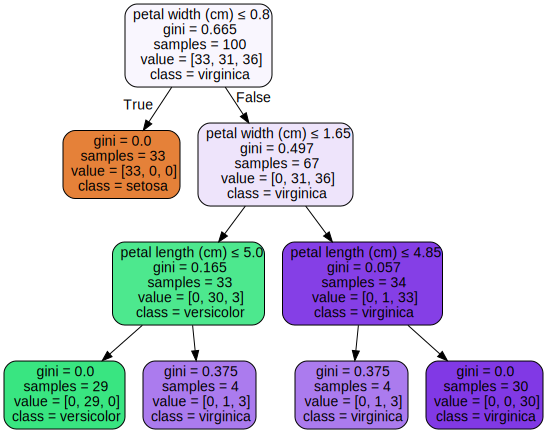

In [20]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [21]:
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.96, 0.98)

## Poszukiwanie optymalnych parametrów metodą walidacji krzyżowej

**Zapamiętaj:** danych testowych możesz użyć tylko raz do sprawdzenia dokładności ostatecznego modelu. 

Aby dopasować parametry drzewa klasyfikacyjnego można wykorzystać oddzielny zbiór walidacyjny lub **metodę walidacji krzyżowej**. W tym przkładzie użyjemy tej drugiej metody.

Metoda ta pozwala określić dokładność modelu w sposób nieobciążony. 
Algorytm metody sprawdzania krzyżowego:

1. Wybierz wartość parametru $b$ (zazwyczaj $b\leq 10$) i podziel losowo zbiór uczący $U$ na $b$ równolicznych (w przybliżeniu) i rozłącznych części $U_1$, $U_2$, . . . , $U_b$.

2.  Dla $h \in {1, . . . , b}$ wykonaj kroki:

  a. zbuduj model na zbiorze $U|U_h$ (wyłączając jedną część),

  b.  oszacuj błąd klasyfikacji modelu na zbiorze $U_h$ (wykorzystując $U_h$ jako zbiór walidacyjny).

3. Wyznacz ocenę błędu klasyfikacji modelu uśredniając wartości otrzymane w kroku 2. Otrzymany wynik jest nieobciążonym estymatorem błędu klasyfikacji

Biiblioteka `sklearn` dostarcza metodę `GridSearchCV` do przeszukiwania przestrzeni hiperparametrów modelu z wykorzystaniem walidacji krzyżowej.


In [36]:
from sklearn.model_selection import GridSearchCV
clf_grid  = None

# YOUR CODE HERE
parameter_grid = {'max_depth': np.arange(3, 7),
                  'max_features': np.arange(1, 5)}

clf_grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid, cv=3, iid=False)

clf_grid.fit(X_train, y_train)

print ("Najlepsza dokładność {}".format(clf_grid.best_score_))
print ("Dobrane parametry: {}".format(clf_grid.best_params_))




Najlepsza dokładność 0.9497920380273323
Dobrane parametry: {'max_depth': 3, 'max_features': 2}


In [37]:
assert type(clf_grid) == GridSearchCV
assert clf_grid.best_score_ > 0.92

Teraz możemy przetestować otrzymany model na danych testowych

In [38]:
clf_grid.best_estimator_.score(X_test, y_test)

0.96

# Istotność zmiennych objaśniających

Zaletą drzewa klasyfikacyjnego jest możliwość określenia istotności poszczególnych zmiennych

In [39]:
ids = np.argsort(clf_grid.best_estimator_.feature_importances_)

for i in ids[::-1]:
    print (iris.feature_names[i], clf_grid.best_estimator_.feature_importances_[i])

petal width (cm) 0.933969379453312
petal length (cm) 0.062447703893291344
sepal length (cm) 0.0035829166533965923
sepal width (cm) 0.0


Dla poprzedniego modelu

In [40]:
ids = np.argsort(clf.feature_importances_)


for i in ids[::-1]:
    print (iris.feature_names[i], clf.feature_importances_[i])

petal width (cm) 0.9308196108729353
petal length (cm) 0.06918038912706467
sepal width (cm) 0.0
sepal length (cm) 0.0


# Zadanie

Zbuduj drzewo klasyfikacyjne dla danych dotyczących złośliwości raka piersi. Znajdź optymalne parametry i sprawdź jaka jest istotność poszczególnych zmiennych objaśniających.

**Krok 1:** Wczytanie danych i podział na dane treningowe  i testowe w proporcji $0.77:0.33$. Aby móc porównać wyniki z kolegami ustaw `random_state` na 1

In [41]:
breast = load_breast_cancer()


# YOUR CODE HERE
breast = load_breast_cancer()
X,y = breast.data, breast.target

X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(X, y, test_size=0.33, random_state=1)


In [42]:
assert X.shape == (569, 30)
assert X_train_breast.shape == (381, 30)
assert X_test_breast.shape == (188, 30)
assert y_train_breast.shape == (381,)
assert y_test_breast.shape == (188,)

**Krok 2:** Medodą walidacji krzyżowej znajdź optymalne drzewo klasyfikujące:

In [43]:
parameter_grid = {'max_depth': np.arange(3, 30),
                  'max_features': np.arange(1, 30)}

# YOUR CODE HERE
clf_grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid, cv=3, iid=False)
clf_grid.fit(X_train_breast, y_train_breast)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 2

In [44]:
assert type(clf_grid) == GridSearchCV
assert clf_grid.best_score_ > 0.95

**Krok 3:** Podaj dokładność modelu na danych testowych:


In [45]:
# YOUR CODE HERE
best_score = clf_grid.best_estimator_.score(X_test_breast,y_test_breast)


In [46]:
print(best_score)
assert best_score > 0.88 
assert best_score < 0.95

0.9308510638297872


**Krok 4:** Sprawdź istotność poszczególnych zmiennych, która cecha jest najistotniejsza?

In [47]:
most_significant_feature = ''

# YOUR CODE HERE
ids = np.argsort(clf_grid.best_estimator_.feature_importances_)
for i in ids[::-1]:
    print(breast.feature_names[i], clf_grid.best_estimator_.feature_importances_[i])
most_significant_feature = breast.feature_names[ids[-1]]
most_significant_feature
    

worst perimeter 0.8440480930317248
worst concave points 0.06959958312625691
worst area 0.023804860583006786
mean radius 0.01604572526761273
worst smoothness 0.011380447212965631
mean compactness 0.010493571195774421
perimeter error 0.01036402093409819
mean smoothness 0.010202083107002905
worst texture 0.0028208524719823855
worst symmetry 0.001240763069575187
mean perimeter 0.0
radius error 0.0
mean texture 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
mean area 0.0
worst fractal dimension 0.0
texture error 0.0
area error 0.0
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.0
worst compactness 0.0
worst concavity 0.0
smoothness error 0.0


'worst perimeter'

In [48]:
most_significant_feature == 'mean concavity'


False

**Krok 5:** Podgląd otrzymanego drzewa

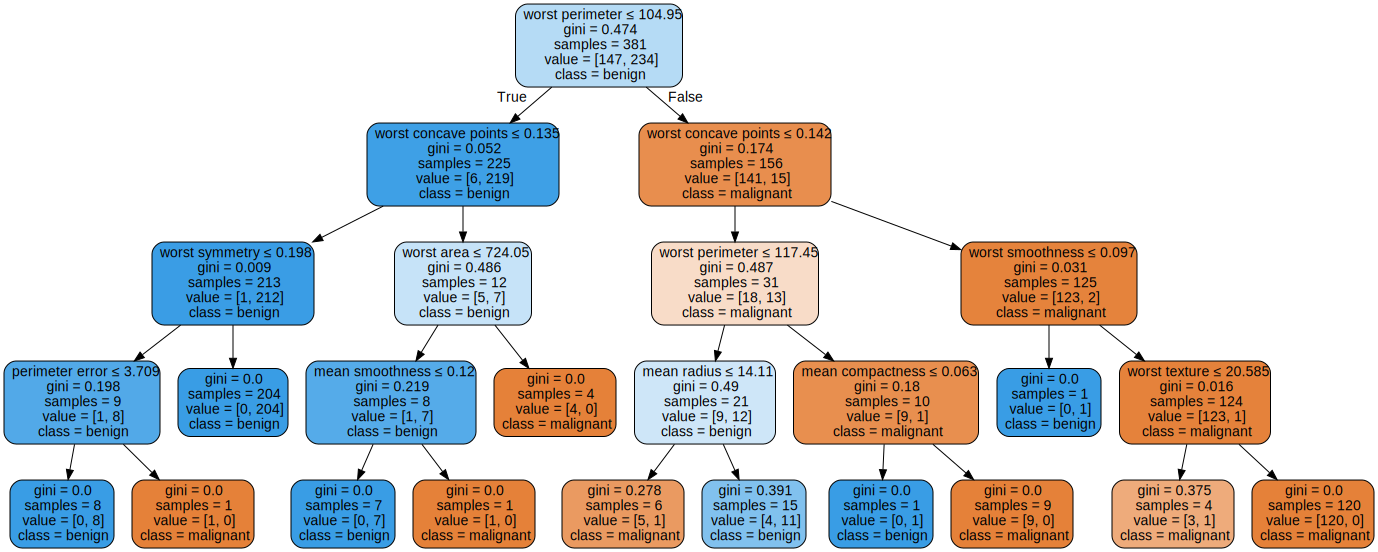

In [49]:
dot_data = export_graphviz(clf_grid.best_estimator_, out_file=None, 
                         feature_names=breast.feature_names,  
                         class_names=breast.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Krok 6:** Czas na zabawę! Spróbuj dopasować inne parametry i poprawić powyższy wynik.